# End To End Project

A demonstration of end to end project in data science using a housing data

In [1]:
dataset_path = '../datasets/Hands_on_ML/housing/housing.csv'

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## See The Data

In [4]:
housing_df = pd.read_csv(dataset_path)

In [5]:
housing_df.head(10) # display the top data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing_df.info() # display some column statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_df['ocean_proximity'].value_counts() # find the categories and number of distinct values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

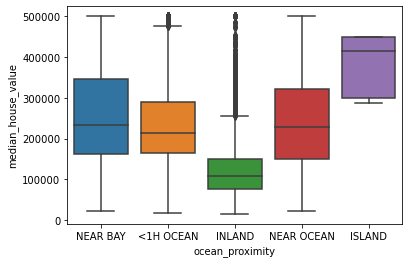

In [8]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)

In [9]:
housing_df.describe() # some stats of numerical values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

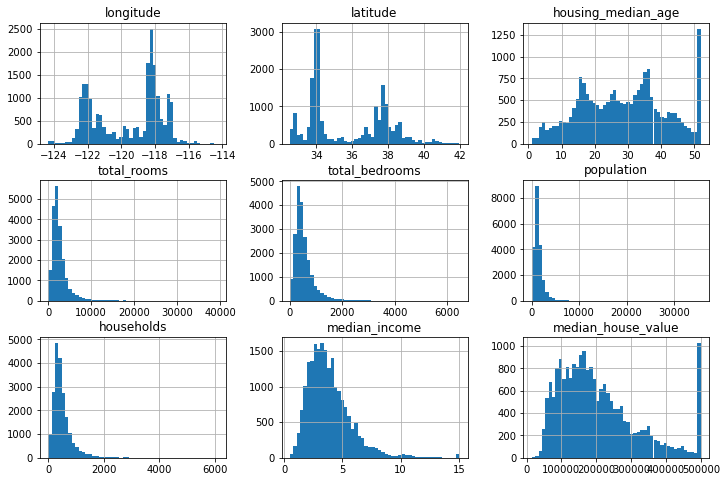

In [10]:
housing_df.hist(bins=50, figsize=(12, 8))

## Create The Test Set

### Randomly Just Split The Data

In [21]:
def suffle_and_split_data(df, test_ratio, random_seed):
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

In [24]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42) # same with sklearn

In [25]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


### Stratified Sampling

In [27]:
housing_df['income_cat'] = pd.cut(housing_df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [34]:
housing_df['income_cat'].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

<AxesSubplot:>

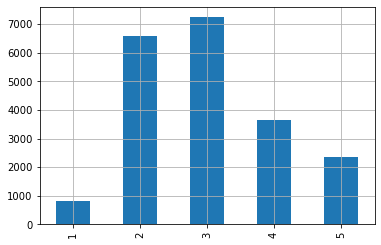

In [56]:
housing_df['income_cat'].value_counts().sort_index().plot.bar(grid=True)

In [36]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [37]:
splitted_df_lists = []

In [47]:
for train_indices, test_indices in splitter.split(housing_df, housing_df['income_cat']):
    strat_train_set_n = housing_df.iloc[train_indices]
    strat_test_set_n = housing_df.iloc[test_indices]
    splitted_df_lists.append([strat_train_set_n, strat_test_set_n])

In [50]:
splitted_df_lists[0][0].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
1286,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466,92600.0,INLAND,3
18078,-118.36,33.85,34.0,1086.0,197.0,509.0,158.0,6.1133,349300.0,<1H OCEAN,5
4396,-122.13,37.41,36.0,4787.0,900.0,2039.0,890.0,5.4063,440900.0,NEAR BAY,4
18031,-118.44,34.31,22.0,3182.0,822.0,2661.0,746.0,2.7472,160100.0,<1H OCEAN,2
6753,-118.13,34.06,17.0,1714.0,572.0,1590.0,568.0,1.1875,183900.0,<1H OCEAN,1


In [51]:
strat_train_set, strat_test_set = train_test_split(housing_df, test_size=0.2, stratify=housing_df['income_cat'], random_state=42)

In [52]:
housing_df['income_cat'].value_counts().sort_index() / len(housing_df)

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [53]:
strat_train_set['income_cat'].value_counts().sort_index() / len(strat_train_set)

1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: income_cat, dtype: float64

In [54]:
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64

In [58]:
strat_train_set = strat_train_set.drop('income_cat', axis=1)

In [59]:
strat_test_set = strat_test_set.drop('income_cat', axis=1)

In [60]:
strat_train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
1286,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466,92600.0,INLAND
18078,-118.36,33.85,34.0,1086.0,197.0,509.0,158.0,6.1133,349300.0,<1H OCEAN
4396,-122.13,37.41,36.0,4787.0,900.0,2039.0,890.0,5.4063,440900.0,NEAR BAY
18031,-118.44,34.31,22.0,3182.0,822.0,2661.0,746.0,2.7472,160100.0,<1H OCEAN
6753,-118.13,34.06,17.0,1714.0,572.0,1590.0,568.0,1.1875,183900.0,<1H OCEAN
